In [1]:
import numpy as np
import random
from random import randrange
import matplotlib.pyplot as plt

# Perceptrons Notebook

# Part 1: Binary Perceptron

In order to gain a deeper understanding of Machine Learning and Neural Networks, we are going to have to start out by learning about Perceptrons.  In this notebook we will be building our own Perceptron class by hand, examining its performance on different datasets, and learning how to use prebuilt python libraries to implement this classifier.   



Perceptrons are the building blocks of Neural Networks, and while this may sound complicated, their function is well defined by simple Linear Algebra concepts that you are already very familiar with.  As with Neural Networks in general, Perceptrons can be understood through an analogy to biology.  Our brain is composed of Neurons; each Neuron has many dendrites branching out to recieve signals, a cell body that process these inputs, and a single Axon which sends out information to other Neurons.  While a single Neuron cannot accomplish much on its own, combining a whole network of them allows for the incedible functionality that we get from our brain.  An Artificial Neural Network functions in much the same way, with powerful emergent properties coming out of the combination of simple building blocks.  In this analogy, the Perceptron acts as a single Neuron.  And while in later weeks we will examine how Neural Networks are formed by linking these together, this week we will focus on the structure of a single Perceptron and the problems it is able to solve.

### Introduction

A Perceptron is known as a Binary Linear Classifier.  This means it is a good model to use so long as we have a set of linearly separable data that we want to put into two different categories.  While later in this homework you will look into the different python toolkits that allow us to work with Perceptrons, we will start off by building one by hand.  Perceptrons are relatively simple to construct, and doing so should give you a deeper understanding of how and when to use the prebuilt libraries.

![title](Materials/perceptronModel.png)

Above is a picture of a Perceptron. From here the components should be pretty easy to see.  We have an array of inputs, their corresponding weights, and an activation function (in the above model this activation function is more specifically a step function).  Make sure this picture makes sense to you, because now we will be building out a Perceptron class.  <br>Specifically, we want our Perceptron class to be able to do the following:
* Take a weighted sum
* Compute an activation function
* Train our weights
* Predict a classification

It is okay if all of those bullet points don't make sense to you right now.  We suggest scrolling down to read over the perceptron class and get a sense for what code you need to fill in.  But the specifics are covered in the next few sections, going over precisely what needs to be implemented and why.

## (TODO) Weighted Sum

The first step in building a Perceptron is being able to calculate the weighted sum. The summation of weighted inputs should draw your mind to a familiar concept.  Note how this changes when you want process multiple inputs at once. Specifically for a $d$ dimensioned datapoint, the function we are coding is as follows:
$$weightedSum=\sum_{i=1}^d x_i*w_i$$

Fill in **Part1** of the weightedSum function.  This function should be able to handle multiple inputs at once, where $X$ is passed in as a $R^{nxd}$ dimensioned matrix where $n$ is the number of datapoints and $d$ is their dimension.

## (TODO) Activation Function

Next we will take a look at the activation function.  An activation function is a non-linear function that in our case maps a value to a binary output.  There are a lot of different activation functions that can be used, but the one we use for Perceptron is very simple:

$$ f(x) = 
        \begin{cases}
        1, x \geq 0 \\
        -1, x < 0
        \end{cases} 
$$
 

When we pass in our weighted sum to this activation function, we are using information about a point of data to assign it to one of two categories, -1 or 1.  The binary part of Binary Linear Classifier should now make sense. We have started a function called activation below, fill in the code for **Part 2** so that the activation performs as it is defined above.

## (TODO) Prediction

A Perceptron should be able to take an input and predict what class it belongs to, -1 or 1.  With what we have currently, you should be able to implement this logic.  Write the code for **Part 3** in the prediction function of the Perceptron class.  Make sure to utalize the functions you have already written. 

## (TODO) Train Weights

We will not be able to get a good prediction for our data if we don't have the correct weights.  Really, the main 
point of Perceptron is to determine the weight on each input that will allow us to achieve accurate classification of our data.  We do this by initializing our weights to zero and then using the Perceptron update formula.  To perform an update, we will loop through every datapoint and if that point (with true value $y^*_i$) is misclassified, change the weights using:

$${w}_{new} = {w}_{old} + r * y^*_i * {x}_i$$

Implement this update formula in **Part 4** of the train function below

In [2]:
class Perceptron():
    """
    Perceptron class for Binary Linear Classification.
    """
    weights = []
        
    def weightedSum(inputs,weights):
        """
        Write the code for calculating the Perceptrons weighted sum.
        inputs - nxd dimensional matrix

        return - nx1 column vector of weighted sums
        """
        result = None
        #Use self.weights for the weights
        #TODO: PART 1
        #Start 
        result = inputs@weights
        #End

        return result

    def activation(x):
        """
        Write the code for the Perceptron activation function.
        x - nx1 column vector

        return - nx1 column vector of 1's and 0's
        """
        result = None

        ##TODO: PART 2
        #Start
        x[x>=0] = 1
        x[x<0] = -1
        result = x
        #End

        return result
    
    
    def predict(self,inputs):
        """
        Calculates predicted class for each input
        
        inputs - n x d matrix
        
        return - n x 1 column vector
        """
        pred = []
        #TODO: Part 3
        #Start
        pred = Perceptron.activation(Perceptron.weightedSum(inputs, self.weights))
        #End
        return pred
    
    def train(self, inputs, classes):
        """
        Update self.weights for better classification.
        
        inputs - n x d matrix
        classes - n x 1 column vector
        """
        num_samples = inputs.shape[0]
        dim = inputs.shape[1]
        self.weights = np.zeros((dim,1))
        r = .1

        stop = 10000
        converged = True
        for i in range(stop):
            #TOD0: Part 4
            #Start
            pred = self.predict(inputs)
            for x in range(num_samples):
                if classes[x] != pred[x]:
                    converged = False
                    modifier = r*classes[x]*inputs[x,:]
                    modifier = modifier.reshape((dim,-1))
                    self.weights += modifier
            if converged:
                break
            converged = True
            #End

As this point you may have two questions.  What is r? And when do we stop updating?  r is our learning rate. it scales how much our weights change each update. This is know as a hyperparameter, and while you don't need to understand what that means right now, just know it is a value we can change to optimize our performace. In this notebook just set r=.1. 
And as for when to stop updating, we can see from the algorithm that this is done once we have no incorrect classifications in a single update loop. However, for data that is not linearly separable, this case will never be reached and we will get stuck in an infinite loop. Therefore it is good practice to put a break condition into the code such as a max length of time or number of iterations.



## Real Data
With our Perceptron class defined, we can now take a look at how it performs on actual data.  Imagine you are playing a little game with your friends.  Sally has two types of candy; both look identical but one is incredibly spicy.  She lays these candies out on the table according to a linear pattern, and you are trying to avoid the spicy ones while getting the tasty ones.  Sally promises that she will keep the pattern the same for everyone and lets you go last.  

You think that you can train a Perceptron to uncover this pattern, so you pay close attention to where all the tasty and spicy candies were for your other friends.  Run the cell below to generate the observed locations of the candy and their corresponding flavors. 

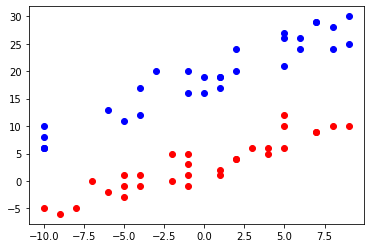

In [3]:
def generateData(num, min_error):
    """
    Generates previously seen candy locations.
    
    return - (data, classes)
        data: num x 2 Matrix of [x, y] positions
        classes: num x 1 column vector of 1s (first num/2) and -1s (last num/2)
    """
    data = []
    classes = []
    split = int(num/2)
    for i in range(split):
        x = randrange(-10,10)
        y = x + 12
        y += randrange(min_error,12)
        data.append([x,y])
        classes.append([1])
    for i in range(split):
        x = randrange(-10,10)
        y = x + 12
        y += randrange(-12,-min_error)
        data.append([x,y])
        classes.append([-1])
    data = np.array(data)
    classes = np.array(classes)
    return (data, classes)

candy_locations, candy_flavors = generateData(60,4)
plt.plot(candy_locations[:30,0], candy_locations[:30,1], 'bo', candy_locations[30:,0], candy_locations[30:,1], 'ro')

## (TODO) Unseen Data
It is almost your turn to play the game, but you want to test how well your Perceptron does before you put your tastebuds on the line.  John is going directly before you, so you try to predict the outcome of his game.  **Finish the getAccuracy function** below that calculates how accurately your perceptron predicts the labels of new data. 

After writing that code, run the cell to see how well your perceptron does on John's data and **comment on the results you see**. Does it do a good job predicting?  Why or why not? How does the visualization help explain what is going on?


Accuracy:  0.7


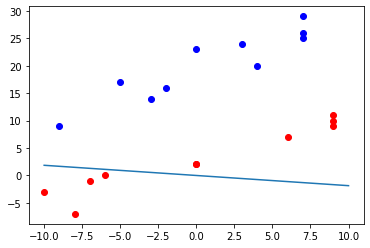

In [4]:
john_locations, john_flavors = generateData(20,4) #You should compare your perceptron's result to john_flavors
candy_perceptron = Perceptron() #Train this perceptron

def getAccuracy(perceptron, X, Y, newX, newY):
    """
    Calculates how accurately perceptron predicts the newY for newX after being trained on X and Y
    
    perceptron - the perceptron to train and use for predictions
    X - X data for training (candy_locations) 
    Y - Labels for training (candy_flavors) 
    newX - newly aquired data for prediction (john_locations)
    newY - labels of new data for determining accuracy of prediction (john_flavors)
    """
    Accuracy = 0
    #TODO
    #Start
    perceptron.train(X, Y)
    pred = perceptron.predict(newX)
    correct = 0
    num_candies = len(pred)
    for i in range(num_candies):
        if newY[i] == pred[i]:
            correct += 1
    Accuracy = correct/num_candies
    #End
    
    print("Accuracy: ", Accuracy)

#Calculating how well your perceptron predicts the flavor of john's candy
getAccuracy(candy_perceptron, candy_locations, candy_flavors, john_locations, john_flavors)

#Visualizing your results
plt.plot(john_locations[:10,0], john_locations[:10,1], 'bo', john_locations[10:,0], john_locations[10:,1], 'ro')
weights = candy_perceptron.weights
x = np.linspace(-10, 10, 1000)
plt.plot(x, -(weights[0]/weights[1])*x)




### Write Your Comments Here:
We clearly have very low accuracy here, the Perceptron does not generate a line that seperates the data well.  The line goes through the origin while our data is clearly seperated by a linear equation with a different y-intercept.

## (TODO) Add Bias

You may have noticed that your perceptron did not do a great job making predictions and separating the data.  In this section we will explore why this is.  If you look closely at the perceptron diagram at the start of this assignment, you should notice one key aspect that we have not included.  It is the constant term that is added into the weighted sum, this is what we call the bias.  To analyze why this is needed, lets take a look at the 2D example of a Perceptron.  If we have inputs $x_1$ and $x_2$ and weights $w_1$ and $w_2$, taking the weighted sum combined with our activation function gives us a boundary at:

$$x_1*w_1 + x_2*w_2 = 0$$
$$x_2 = -\frac{w_1}{w_2}*x_1$$

As you can see, this defines a line at the origin with a slope of $-\frac{w_1}{w_2}$.  If you look back at the results from John's data, you should see that the line our perceptron generated is indeed going through the origin.  Clearly no such line will be good at separating our data, so we need to add a bias if we want a line with a different y-intercept.  When we append a constant to our input and give it a corresponding weight, our 2D example becomes:

$$1*w_0 + x_1*w_1 + x_2*w_2 = 0$$
$$x_2 = -\frac{w_1}{w_2}*x_1 - \frac{w_0}{w_2}$$

As you can see, this defines a new line with the same slope as before, but a y-intercept now at $- \frac{w_0}{w_2}$.  This extends to higher dimensions as well; a constant term should always be augmented to the input data. **Lets implement this step by filling in the addBias function below.**

In [5]:
def addBias(inputs):
        "Returns the inputs but with the bias added in"
        #TODO: Part 5
        #Start
        inputs = np.concatenate([np.ones((inputs.shape[0], 1)), inputs], axis=1)
        #End
        
        return inputs

## (TODO) Accuracy with Bias
After failing at predicting John's candy flavors the first time, you have your fingers crossed that the added bias term will get your Perceptron working better.  **Fill in code below to calculate your accuracy on the augmented data and comment on the performance you see.**

Accuracy:  1.0


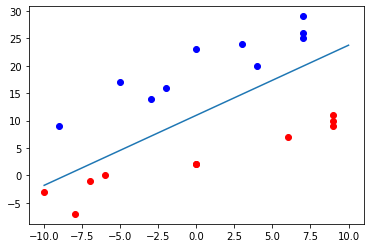

In [6]:
#TODO
#Start
getAccuracy(candy_perceptron, addBias(candy_locations), candy_flavors, addBias(john_locations), john_flavors)
#End

#Visualizing your results
plt.plot(john_locations[:10,0], john_locations[:10,1], 'bo', john_locations[10:,0], john_locations[10:,1], 'ro')
weights = candy_perceptron.weights
x = np.linspace(-10, 10, 1000)
plt.plot(x, -(weights[1]/weights[2])*x - (weights[0]/weights[2]))

### Write Your Comments Here:
Adding the bias in fixes our issues.  The Perceptron can now generate an appropriate boundary that exactly seperates our data.

## Final Run
It is finally your turn to play the game; armed with your perceptron you are feeling very confident in your chances of avoiding all of the spicy candy. Sally puts down the candy on the table following the same linear pattern as before.  You run your perceptron and eat all the candies that it predicts to be tasty.  Look at the output below and comment on the results you see.  **Did you end up eating any spicy candy? If so, what do you think went wrong? And come up with at least one thing you might be able to do to increase your accuracy.**

Accuracy:  0.95


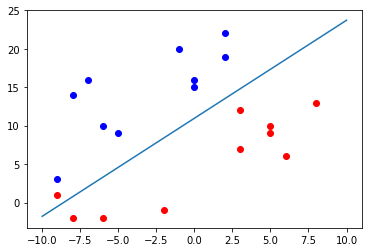

In [7]:
sally_locations, sally_flavors = generateData(20,0) 
getAccuracy(candy_perceptron, addBias(candy_locations), candy_flavors, addBias(sally_locations), sally_flavors)
#Visualizing you results
plt.plot(sally_locations[:10,0], sally_locations[:10,1], 'bo', sally_locations[10:,0], sally_locations[10:,1], 'ro')
weights = candy_perceptron.weights
x = np.linspace(-10, 10, 1000)
plt.plot(x, -(weights[1]/weights[2])*x - (weights[0]/weights[2]))


### Write Your Comments Here:
Unless you are very lucky, you probably noticied that the perceptron misclassified some of the candy.  Even after taking data from your friends' games, the Perceptron was not able to pick up on the exact linear pattern that Sally was following.  So when she laid out the candy for your, some of the pieces right near the boundary were labeled incorrectly.  There are a couple valid solutions, an easy one is to watch your friends play more games so you can gather more data.  Another less obvious solution that touches on topics learned later in this course would be to pick a boundary line exactly inbetween the two classes of data (if you scroll up you should see that our Perceptron's line isn't totally centered)

## Binary Perceptron Conclusions

Hopefully this first part of the notebook has given you a better understanding of what a Perceptron is and how they are used.  After building your own Perceptron class you should not only understand why it is called a Binary Linear Classifier, but also see the importance of the bias term.  Finally, the last section should have made clear some of the shortcomings of Perceptron, especially when we are lacking data.  In the next part of this notebook we will be exploring how Perceptron can (and can't) be used on some more advanced problems.  You will also be introcuded to the prebuilt python libraries that you can use to implement Perceptron. 

# Part 2: Multiclass Perceptron

In this part of the notebook, we will cover an extension of the Binary Perceptron that was done above. Recall that for the Binary Perceptron, one requirement of the data was that there could only be two output classes. This meant that if we wanted to classify some input as more than just two outputs, we would have to look elsewhere for a solution. However, with some slight modifications to the Binary Perceptron, we are able to classify inputs with any amount of labels. 

To motivate studying the Multiclass Perceptron, let us revisit the candy example. Recall that Sally had two types of candy (spicy or sweet) and our job was to determine what type a candy was. Suppose that Sally now has three types of candy: spicy, sweet, and salty. Now instead of laying out the candies in some linear pattern, Sally decides to make it easier for us by putting candies of similar type near each other into clusters. Even though our goal still remains the same, we cannot use the binary perceptrons since there's more than two classes. We represent the candy type in code as labels 0, 1, or 2.

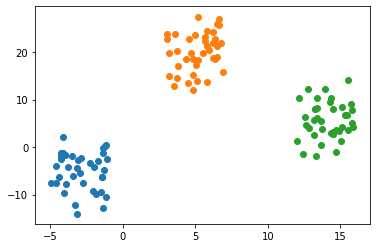

In [8]:
def generate_multiclass_data(c1, c2, c3, dis, size):
    center1 = c1
    center2 = c2
    center3 = c3
    distance = dis
    size = size
    data = []
    classes = []
    x1 = np.random.uniform(center1[0], center1[0] + distance, size=(size,))
    y1 = np.random.normal(center1[1], distance, size=(size,)) 
    for i in range(size):
        data.append([x1[i], y1[i]])
        classes.append(0)

    x2 = np.random.uniform(center2[0], center2[0] + distance, size=(size,))
    y2 = np.random.normal(center2[1], distance, size=(size,)) 
    for i in range(size):
        data.append([x2[i], y2[i]])
        classes.append(1)

    x3 = np.random.uniform(center3[0], center3[0] + distance, size=(size,))
    y3 = np.random.normal(center3[1], distance, size=(size,)) 
    for i in range(size):
        data.append([x3[i], y3[i]])
        classes.append(2)
        
    plt.scatter(x1, y1)
    plt.scatter(x2, y2)
    plt.scatter(x3, y3)
    plt.show()

    return np.array(data), np.array(classes)
    
candy_data, candy_classes = generate_multiclass_data((-5, -5), (3, 20), (12, 5), 4, 40)
candy_data = addBias(candy_data)

As we can see from the data, even though our binary perceptron will not work on this type of data, we should be able to classify the candy since they are in very distinct groups.  

## (TODO) Modifying Weights
The first modification we make to our perceptron is to the weights. In the binary case, we could get away with just using one weight vector because by taking the dot product of this vector and the input, we could use a threshold to classify into two cases. However, with more than two cases we cannot use this trick and thus need a weight vector for each possible class. Update the MultiClassPerceptron to account for this.

## (TODO) Modifying Classification
Because we have more than one weight vector, we cannot classify by just taking a single dot product. Instead, to classify an input point, we compute the dot product of the point with every weight vector. The class that we predict the input as is then the class corresponding to the largest dot product. Mathematically, this is taking the argmax of the dot product of our input and every weight vector.

### What does this mean for our activation function?

Our activation function now is simply the argmax of all of the weighted sums. 
![title](Materials/linear_multiclass.png)

## (TODO) Modifying Update Step

Because we have multiple weight vectors, our update algorithm needs to be modified slightly. We will still only update the weights when a point is misclassified. However, instead of updating a single weight vector we will update all of them. If we incorrectly classify a point, we will update the correct weight by adding the input scaled by the learning rate, and update the other weights by subtracting that value. 

### What is our new update scheme really doing?

Because our new classification algorithm finds the largest dot product between the input and weights, if we incorrectly classify a point we want to increase this dot product for the correct class and decrease it for the other classes. Ultimately, we want the dot product with the correct class to be the largest out of all weight vectors  

In [9]:
class MulticlassPerceptron():
    """
    Perceptron class for Multiclass Linear Classification.
    """
        
    def weightedSum(self, inputs, weight):
        """
        Calculates the weighted sum of an input and some weight vector
        """
        return inputs@weight

    #TODO
    #Start
    def predict(self, training_point):
        """
        Calculates predicted class for a input 
        """
        
        argmax = 0
        max_weight = self.weightedSum(training_point, self.weights[0])
        for i, weight in enumerate(self.weights):
            if max_weight < self.weightedSum(training_point, weight):
                argmax = i
                max_weight = self.weightedSum(training_point, weight)
        return argmax
                    
    
    def train(self, inputs, classes):
        """
        Update self.weights for better classification.
        
        inputs - n x d matrix
        classes - n x 1 column vector
        """
        self.weights = []
        num_samples = inputs.shape[0]
        dim = inputs.shape[1]
        for i in range(3):
            self.weights.append(np.zeros((dim,1)))
        r = .1
        stop = 10000
        converged = True
        for i in range(stop):
            for x in range(num_samples):
                pred = self.predict(inputs[x])
                if classes[x] != pred:
                    converged = False
                    modifier = r*inputs[x]
                    modifier = modifier.reshape((dim,-1))
                    for j, _ in enumerate(self.weights):
                        if j != classes[x]:
                            self.weights[j] -= modifier
                        else:
                            self.weights[j] += modifier
            if converged:
                break
            converged = True
        print("Converged:", converged)
    #End

## (TODO) Training Multiclass Perceptron on Data

Now we test our newly built Multiclass Perceptron to classify Sally's candies. Using the **candy_data** and **candy_classes** variable that were generated above, train the Multiclass Perceptron and report the correct weight vectors for that set of data. 

In [10]:
#TODO
#Start
mcp = MulticlassPerceptron()
mcp.train(candy_data, candy_classes)
print("Trained Weight Vectors:", mcp.weights)
#End

Converged: True
Trained Weight Vectors: [array([[-0.2       ],
       [-6.20019778],
       [-5.77882017]]), array([[-0.4       ],
       [-2.13886907],
       [ 0.99140565]]), array([[-0.2       ],
       [ 4.02167451],
       [-1.94047167]])]


## (TODO) Testing Performance of Multiclass Perceptron on Unseen Data

Next we want to see how well our classifier performs on new candies that Sally puts out. With the new validation dataset generated below, write a function that prints the accuracy of our classifier. 

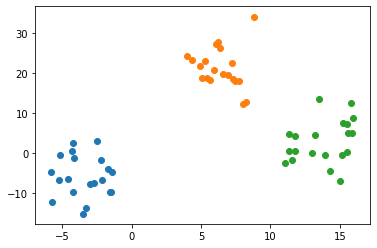

In [11]:
# New Data
new_candy_data, new_candy_classes = generate_multiclass_data((-6, -6), (4, 19), (11, 4), 5, 20)
new_candy_data = addBias(new_candy_data)

In [12]:
#TODO
#Start
def getMcpAccuracy(mcp, data, classes):
    wrong = 0
    for i, training_point in enumerate(data):
        if (classes[i] != mcp.predict(training_point)):
            #incorrectly classified
            wrong += 1
    print("Accuracy:", 1-wrong/len(data))
getMcpAccuracy(mcp, new_candy_data, new_candy_classes)
#End

Accuracy: 0.9333333333333333


### How did your classifier do?

The classifier should perform pretty well given that the new data generated has a very similar distribution to the test data.

## Multiclass Perceptron Conclusions

As we can see, with some minor modifications we can make our binary perceptron work for the case of multiple classes. Still, the issues of the original binary perceptron remain: we can only work with linearly separable data, and we cannot say anything about the optimality of our weights. Keep these issues in mind in the coming weeks when we will be studying SVMs, Multilayer Perceptrons, and Neural Networks.

# Part 3: Speech Recognition With a Single Layer Perceptron

We will be investigating a binary classification problem on audio data with two labels. The two labels are 'cat' and 'dog'. We will input raw audio data of humans saying the words 'cat' and 'dog'. We will then process this data and apply a few techniques to illustrate that perceptrons can be used to classify audio data.

You will need the dataset of words, here are two ways to obtain it:

**Method 1**
The dataset that we will be using can be found at this link:
https://ai.googleblog.com/2017/08/launching-speech-commands-dataset.html
Downloading this dataset might take a few minutes. You will notice a folder with all kinds of folders, each for a different word. We are only interested in cat and dog. 

**Method 2**
We have provided a zip file with all the necessary datasets you need. You can simply unzip it **in the same directory**

Inside these respective cat and dog folders are raw .wav files. We will by using scipy to convert these raw wav files into discrete time signals. Let us first import all necessary packages:

In [13]:
from sklearn.linear_model import Perceptron
from sklearn.decomposition import PCA
from scipy.io import wavfile
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import os

%matplotlib notebook

Now it is very important that you provide the relative file path to the dog and cat files. We will refer to dogs as 1 and cats as 0 in our binary classifcation scheme:

In [14]:
#Path to the data set containing dog audio samples
path_1  = "Materials/Word_Dataset/dog/"
#Path to the data set containing cat audio samples
path_0  = "Materials/Word_Dataset/cat/"
files_1 = os.listdir(path_1)
files_0 = os.listdir(path_0)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'Materials/Word_Dataset/dog/'

Now we will define some usefull functions that will help us process the data. 

The first function is **numpy_fillna**. This function will simply take in a 2d numpy array where the row vectors are not the same length, and return a 2d numpy array where all the row vectors have the same length. To do this, we simply zero-pad the short row vectors/data vectors to match the length of the longer ones. Worry not, this does not change the relevent audio data at all!

The second function is **get_train_test**. This function performs a few important steps, let us break it down:
1. It will first use the argument N (total number of data points, 50% dog, 50% cat), and r_train (the ratio of training data to testing data) to calculate the number of training samples that we need. The big idea here is to take our data set and partition it into a training dataset and a testing dataset. The training dataset (can be something like 80% of all the data) will be used to actually train the perceptron. The testing dataset (whatever is leftover, 20%) will be used to acually test our perceptron on 'fresh' data.

2. When accumulating the data from the .wav files, this function will trim the audio files nicely. It does this because alot of the times, the audio files have a very unessesary sequence of zeros before the initial useful audio data arrives. It will first find the time point where the audio hits 50% of the maximum value. Then, we instruct the function to call the start of the audio vector 'pre' units before this 50% time point. We can tune pre to untill the audio data appears to be alligned.

3. It will also normalize all the audio vectors by removing their mean and making their variance = 1. The reason for this is to treat very loud audio the same as very soft audio. We have no preference over loud or soft audio when classifying. We subtract the mean in order to remove the offset in audio, which we also do not care about.

4. Finally, the function will put all these normalized and trimmed audio vectors into a large 2d array. Now there is no gurantee that all the row vectors (data/audio vectors) in this 2d array will have the same length. This is where we use **numpy_fillna** to assert this property. Once this is done, we shuffle up the row vectors in order to make the data randomized with respect to the labels. A minor detail: The function will also return the samplerate of the audio data.

In [ ]:
def numpy_fillna(data):
    # Get lengths of each row of data
    lens = np.array([len(i) for i in data])

    # Mask of valid places in each row
    mask = np.arange(lens.max()) < lens[:,None]

    # Setup output array and put elements from data into masked positions
    out = np.zeros(mask.shape, dtype=np.float64)#data.dtype)
    out[mask] = np.concatenate(data)
    return out

def get_train_test(N, pre = 50, r_train = 0.5):
    
    N_train = int(r_train * N)
    
    X_1 = []
    X_0 = []
    
    for i in range(N//2):
        _, data_1 = wavfile.read(os.path.join(path_1, files_1[i]))
        samplerate = _
        data_1 = (data_1 - np.mean(data_1)) / np.std(data_1)
        ind = 0
        thresh = 0.5 * np.max(data_1)
        while abs(data_1[ind]) < thresh:
            ind += 1
        ind -= pre
        data_1 = data_1[ind:]
        X_1.append(data_1)
        
        _, data_0 = wavfile.read(os.path.join(path_0, files_0[i]))
        data_0 = (data_0 - np.mean(data_0)) / np.std(data_0)
        ind = 0
        thresh = 0.5 * np.max(data_0)
        while abs(data_0[ind]) < thresh:
            ind += 1
        ind -= pre
        data_0 = data_0[ind:]
        X_0.append(data_0)
        
    X = numpy_fillna(np.asarray(X_0 + X_1))
    y = np.append(np.zeros(N//2), np.ones(N//2)).reshape(-1, 1)
    
    rng_state = np.random.get_state()
    np.random.shuffle(X)
    np.random.set_state(rng_state)
    np.random.shuffle(y)
    
    y = y.flatten()
    
    X_train = X[:N_train]
    y_train = y[:N_train]
    X_test  = X[N_train:]
    y_test  = y[N_train:]
    
    return X_train, y_train, X_test, y_test, samplerate

Now that the data is nice and 'clean' let us define what we have mathematically. We will call the ith audio file from each file $\vec{d_i}, \vec{c_i} \in R^d$ for the dog and cat respectively. The dimension $d$ of these vectors is much larger than the number of data points, $n$. $X \in R^{n x d}, \vec{y} \in R^n$, the data matrix with corresponding labels will take the following form:

$$X = \begin{bmatrix}
\vec{d_{21}}^T\\
\vec{d_{309}}^T\\
\vec{c_{19}}^T\\
\vec{d_{10}}^T\\
\vec{c_{111}}^T\\
.\\
.\\
.
\end{bmatrix} \; \; \; \;\; \;\; \; \; \; \vec{y} = \begin{bmatrix}
1\\
1\\
0\\
1\\
0\\
.\\
.\\
.
\end{bmatrix}$$

If we chose an 80%, 20% split for train and test data, then $X_{train}$ will just be the first 80% rows vectors of $X$, and $X_{test}$ will be the remaining 20%. Similaraly, $\vec{y_{train}}$ will be the first 80% of the enteries of $\vec{y}$ and $\vec{y_{test}}$ will be the remaining 20%. Or mathematically:


## $$N_{train} = N * (0.8), N_{test} = N - N_{train}$$


## $$X_{train} \in R^{N_{train} x d}, X_{test} \in R^{N_{test} x d}, y_{train} \in R^{N_{train}}, y_{test} \in R^{N_{test}}$$


Now let us fetch the X and y training and testing pairs:

In [ ]:
X_train, y_train, X_test, y_test, samplerate = get_train_test(N = 1500, pre = 500, r_train = 0.6)

Great now we have our testing and training data, we are ready to use the perceptron! To do this, we can use the Sklearn's perceptron package. In the previous part of this jupyter notebook, we learned how a perceptron works and how to build one. For this part, we will use the imported perceptron module for simplicity. 

First thing we do is create our perceptron. There are many parameters we can pass into the Perceptron constructor, however the default parameters will be fine for this project. Here is a link if you are curious about Sklearn's Perceptron under the hood:
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html


## **(TODO) Using Sklearn's perceptron class, find the weights to fit X_train and y_train. Report the weights as a column vector. Make sure to name the column vector of weights $w$**

In [ ]:
#Start Sklearn Perceptron code
#TODO
my_perceptron = Perceptron()
my_perceptron.fit(X_train, y_train)
#Make weights into a column vector
w  = my_perceptron.coef_[0].reshape(-1, 1)

At this point we need a way to test our classifier. Find a value for training_accuracy below which we define as the percentage of correctly classified training points. Recall that given some sample data, we can classify it by taking the inner product (dot product) of our weights with the input data. That quantity should come out to a scalar. We determine that if the scalar is positive, we assign a classification value of 1 and if it is negative we assign a classification value of 0. Or mathematically:
$$y_{predicted} = S(\vec{x_{sample}}^T \vec{weights})$$

If we have multiple input sample points in a matrix:
$$X = \begin{bmatrix}
\vec{x_{1}}^T\\
\vec{x_{2}}^T\\
\vec{x_{3}}^T\\
\vec{x_{4}}^T\\
\vec{x_{5}}^T\\
.\\
.\\
.
\end{bmatrix}, \; \; \; \; \vec{y_{predicted}} = S(X \vec{weights})$$

Where $S(x)$ is $1$ if $x$ is positive and $0$ if $x$ is negative. If we have $S(\vec{x})$ then we apply S to each element in the vector $\vec{x}$ independently. 

## **(TODO) Find the percentage of correctly classified data points that the weights calculated earlier will predict on X_train in comparison to y_train. Store the accuracy into a variable named $training\_accuracy$ (HINT: look into the Perceptron's .score function).**

In [ ]:
#TODO
#Start
training_accuracy = my_perceptron.score(X_train, y_train)
#End
print('Training Accuracy: {0:.2f}%'.format(training_accuracy * 100))

Looks good! It seems that our classifier has fit the training data very well. We will now do the same thing to the testing data:

## **(TODO) Find the percentage of correctly classified data points that the weights calculated earlier will predict on X_test in comparison to y_test. Store the accuracy into a variable named $testing\_accuracy$ (HINT: look into the Perceptron's .score function).**

In [ ]:
#TODO
#Start
testing_accuracy = my_perceptron.score(X_test, y_test)
#End
print('Testing Accuracy: {0:.2f}%'.format(testing_accuracy * 100))

Not very good. What happened here? Well it seems that we have over-fit our data. We know this because we fit the training data extremely well, however the testing data gets missclassified almost all the time (recall that the worst binary classifer will have an accuracy of 50%). That is, our perceptron only knows how to fit what it has seen before. This is often the product of having too many parameters. Let us view just how many paramters we have in relation to the amount of training data points:

In [ ]:
num_params = len(w)
num_data_points = len(X_train)
print('Number of Parameters:', num_params)
print('Number of Data Points:', num_data_points)

That is a ton of parameters. Perhaps it would be smart to perform PCA on this data in order to reduce its dimensionality (number of paramters) down to 2, just to see how distinguishable our test data is. **You do not need to understand PCA in order to follow the notebook. Just know that PCA converts our data matrix from $\mathbb{R}^{n \times d}$ to $\mathbb{R}^{n \times 2}$. That is, each data point will only have dimension 2. This will only be used to visualize our high dimension data set.**

In [ ]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
num_data, dim = X_train_pca.shape
print("Number of data points:", num_data)
print("Number of parameters/dimension of data:", dim)

As we can see, we have reduced our data matrix to having the same number of data points, however now each data point only has dimension 2. Recall that X_train_pca still has our same number of data points, but each data point effectively only has an 'x' and a 'y' component. What we now want is the ability to plot each of these training data points.

Let us build a function that takes in an input matrix and label array X and y respectively. The dimension of X will be N x 2 and y should be a 1 dimensional array of length N. The function will look one row at a time and plot the row of X as an ordered pair on a 2d plot. The color assigned to each label should depend on the value of y for that row. For example, let us say that we wish to plot the 5th row in our data matrix X. We can find the x and y component by looking at the first and second entry of the 5th row of X. Then, we can view the 5th entry in y. If the value is a 1, we can assign the color blue, and 0 gets the color red. Use the plt.scatter function to perform this task:

## **(TODO) Impliment the $plot\_data\_2d$ function. This should plot label '1' data points as blue and label '0' data points as red** 

In [ ]:
def plot_data_2d(X_2d, y_labels):
    assert len(X_2d) == len(y_labels)
    assert X_2d.shape[1] == 2
    N = len(X_2d)
    #TODO
    #Start
    for i in range(N):
        row = X_2d[i]
        if y_labels[i] == 1:
            color = 'blue'
        else: 
            color = 'red'
        plt.scatter(row[0], row[1], c = color)
    #End

Now that we have implemented the function, let us plot the 2d projection of our data points:

In [ ]:
plot_data_2d(X_train_pca, y_train)

This does not look very good. Recall that a perceptron is a linear classifer. However, in 2 dimensions, our data is not linearly seperable. 

**THE DFT PORTION IS COMPLETELY OPTIONAL TO UNDERSTAND. READ IF YOU ARE CURIOUS**

At this point, we may feel like it is time to use other techniques to classify this data. However, 16b to the rescue, we have a very handy tool at our disposal. The discrete fourier transform, or DFT! Why would we even think of using this? Well, first let us ask, what is the best machine for classifying audio? It is us, humans that are the best at this task. This is partially due to the fact that the human ear canal performs a pseudo fourier transform.

Taking the DFT of the audio data will provide us with information on how dominant certain frequencies are. This is important for speech recognition because that human audio only exists in a narrow frequency band (< 4kHz). So, if we take the DFT of our data and omit all frequencies above 6000 Hz (to be safe), we will essentially only be capturing the relevant informatin from the audio sample. This is a method of taking an extremeley long audio sample and reducing it down to its more fundemental components, which is what we wanted to do! Recall that our problem was that the vectors were too long/had too many parameters. By taking the DFT and omitting all frequencies above 6000Hz, we will be reducing the number of parameters significantly.

In 16B we learned how to compute DFTs using the DFT matrix. In practice, we use the FFT or the Fast Fourier Transform. This will result in the same thing, however the FFT computes the DFT in $O(nlogn)$ time rather than $O(n^2)$ time with the 16B method. For the purposes of this notebook, don't worry about how the FFT works, **just know that the output is the same as if you computed the DFT via the DFT matrix**.

So, let us go ahead and compute the 4096 point FFT (remember, the same input/output behavior of the DFT) of each raw audio data vector and construct a new matrix $X_w$:

In [ ]:
#think of this as the resolution of our FFT
NFFT=4096 

#Compute fft for all data points
Xw_train = None

for arr in X_train:
    if Xw_train is None:
        Xw_train = np.fft.fft(arr, n = NFFT)
    else:
        Xw_train = np.vstack((Xw_train, np.fft.fft(arr, n = NFFT)))

Xw_test = None

for arr in X_test:
    if Xw_test is None:
        Xw_test = np.fft.fft(arr, n = NFFT)
    else:
        Xw_test = np.vstack((Xw_test, np.fft.fft(arr, n = NFFT)))

#compute the 6khz cutoff index
six_cutoff = int(NFFT * 6000 / samplerate)
        
#We only care about the magnitude of the complex numbers, hence np.abs
Xw_train = np.abs(Xw_train[:, :six_cutoff])
Xw_test = np.abs(Xw_test[:, :six_cutoff])

To get a better idea of what the data vectors now look like, let us plot the first data vector (now in frequency domain).

## **(Optional) Choose any data point from X_train. Plot it as a time domain signal**

In [ ]:
#TODO
#Start
plt.plot(X_train[4])
plt.title('Time Signal Label 0')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
#end

## **(Optional) Choose the same row from before, but now grab the corresponding row of Xw_train. Plot it as a frequency domain signal**

In [ ]:
#TODO
#Start
fVals=np.arange(start = 0,stop = six_cutoff)*samplerate/NFFT
plt.plot(fVals,Xw_train[4])
plt.title('One Sided FFT')
plt.xlabel('Frequency (Hz)')
plt.ylabel('|DFT Values|')
#End

## **(Optional) Comment on the differences between the frequency domain signal and the time domain signals:**

The frequency domain signal is able to capture seemingly relevant data with only 4000 samples while the time domain signal seems to have important values throughout 8000 samples.

Great, now we have successfully converted all of our data into frequency domain! Let us do the same thing that we did before: Project the data back to 2 dimensions using PCA in order to plot the 'dog's in red and the 'cat's in blue. We will use our previously implimented funtion to plot the data:

In [ ]:
pca = PCA(n_components=2)
Xw_train_pca = pca.fit_transform(Xw_train)
plot_data_2d(Xw_train_pca, y_train)

At last, we have linearly separable data! Now, we will train a perceptron on the FFT data rather than the raw data.

## **(TODO) Use the same process from the previous parts to train a perceptron classifier but this time use the Xw_train data for training. Make sure to store the final weights into a variable called $w\_fft$**

#TODO
#Start
my_perceptron_freq = Perceptron(tol=1e-3, random_state=0)
my_perceptron_freq.fit(Xw_train, y_train)
w_fft = my_perceptron_freq.coef_[0].reshape(-1, 1)
#End
print('Number of parameters/dimension for FFT:', len(w_fft))
print('Number of parameters/dimension for Raw:', len(w))

We were able to reduce the dimensionality significantly and achieve linear separable data! Let us see how it performs:

## **(TODO) Use the same process from the previous parts to report the testing accuracy and training accuracy for the FFT method. Remember to use Xw_train and Xw_test. Store the training and testing accuracies into variables named $training\_accuracy$ and $testing\_accuracy$ respectively.** 

In [ ]:
#TODO
#Start
training_accuracy = my_perceptron_freq.score(Xw_train, y_train)
testing_accuracy = my_perceptron_freq.score(Xw_test, y_test)
#End
print('Training Accuracy FFT Method: {0:.2f}%'.format(training_accuracy * 100))
print('Testing Accuracy FFT Method: {0:.2f}%'.format(testing_accuracy * 100))

Congratulations! You have just classified a dog from a cat! We left the perceptron code to you and we handeled all of the data triming and pre processing.

## **(TODO) Comment below what you learned about perceptrons, audio classification, and linearly separable data.**

We learned that perceptrons, which are natrurally linear classifiers, can also be use to classify non linear data. How did we accomplish this task? We used a non-linear featurization (changing raw audio data to frequency domain data). This was a very strong method of reducing the dimesnionality of our input data to something more managable and representative of the data. We also learned that something as simple as a single layer perceptron can be surprisingly powerful given the right data and the right choice of features. 